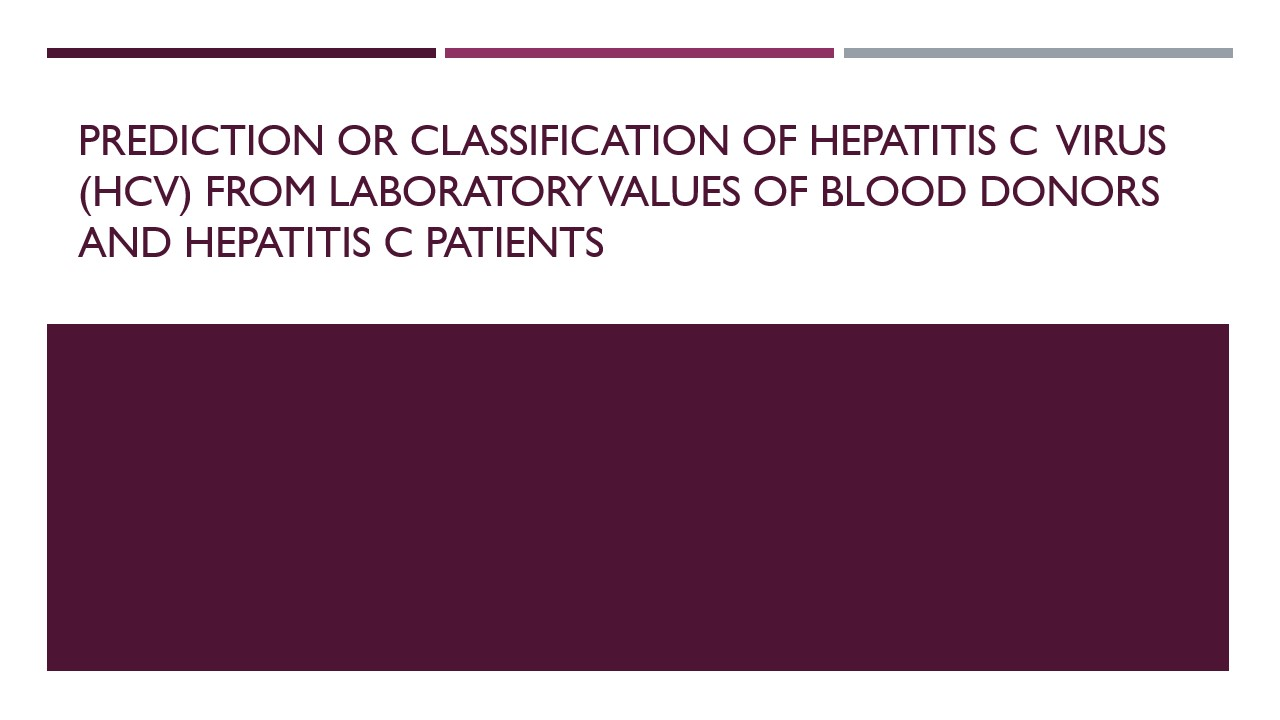

__Abstract:__ The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age.

__Data Link:__ https://archive.ics.uci.edu/ml/machine-learning-databases/00571/

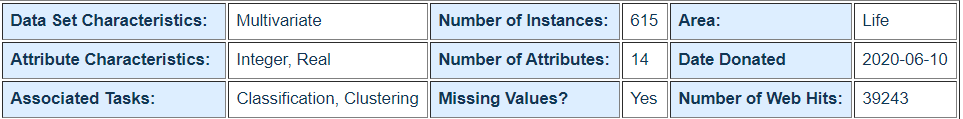

# Attribute Information:

_All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14._

__(1) X (Patient ID/No.)__

__(2) Category__: (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

__(3) Age__ (in years)   

__(4) Sex__ (f,m)   

__(5) ALB:__ Albumin Blood Test   

__(6) ALP:__ Alkaline phosphatase   

__(7) ALT:__ Alanine Transaminase   

__(8) AST:__ Aspartate Transaminase   

__(9) BIL:__ Bilirubin   

__(10) CHE:__ Acetylcholinesterase 

__(11) CHOL:__ Cholesterol 

__(12) CREA:__ Creatinine   

__(13) GGT:__ Gamma-Glutamyl Transferase 

__(14) PROT:__ Proteins 

In [2309]:
# importing required libraries
import pandas as pd
import numpy as npp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

# Data Exploration

In [2310]:
#Reading the csv file
data = pd.read_csv('hcvdat0.csv')

# Retrieving random samples from data
data.sample(frac=0.10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
448,449,0=Blood Donor,50,f,42.5,74.0,10.9,23.0,4.6,9.42,6.33,76.0,9.0,68.8
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
171,172,0=Blood Donor,47,m,36.7,44.8,29.3,23.5,6.9,7.38,4.44,87.0,24.4,68.3
576,577,2=Fibrosis,71,m,37.0,NaN,130.0,90.0,15.0,9.92,4.70,79.0,77.0,76.0
77,78,0=Blood Donor,38,m,48.4,44.9,23.4,22.1,7.9,10.53,7.51,87.0,43.2,82.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,247,0=Blood Donor,55,m,46.2,87.1,36.9,21.0,4.5,7.55,6.33,80.0,30.2,72.2
521,522,0=Blood Donor,61,f,43.4,47.5,12.8,17.3,5.6,7.52,5.81,71.0,11.8,69.9
159,160,0=Blood Donor,46,m,47.4,55.9,35.2,33.5,10.2,10.61,4.95,96.0,41.7,76.3
68,69,0=Blood Donor,37,m,46.4,53.3,20.2,24.9,8.7,8.63,5.90,86.0,23.3,78.9


In [2311]:
# Descriptive frame of the data
data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


__From the above descriptive statistics, it can be observed that the median age of individuals in this data is 47, 
youngest age is 19 while the oldest age is 77.__

In [2312]:
# Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [2313]:
# Checking for missing values 
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [1]:
# Iterating through the Category column
# for i in data['Category']:
    # print (i)

# Data Preprocessing

__Removing the '0s=suspect Blood Donor' entry as it is irrelevant to out analysis. More so, it has only 7 entries__

In [2315]:
data = data[data['Category'] != '0s=suspect Blood Donor']

__Filling Missing Values__

In [2316]:
# Filling NAN values with median of the corresponding column
data.ALP.fillna(data.ALP.median(),inplace=True)
data.ALT.fillna(data.ALT.median(),inplace=True)
data.PROT.fillna(data.PROT.median(),inplace=True)
data.CHOL.fillna(data.CHOL.median(),inplace=True)
data.ALB.fillna(data.ALB.median(),inplace=True)

__Feature Engineering__

In [2317]:
#Engineering the Sex column via One-hot encoding 
sex_column = pd.get_dummies(data.Sex)
sex_column = sex_column.rename(columns = {'f':'Female','m':'Male'}) 
data = data.join(sex_column)
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Female,Male
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1


In [2318]:
#Import label encoder to encode sex column
label_encoder = preprocessing.LabelEncoder()
data['Sex']= label_encoder.fit_transform(data['Sex']) 

In [2319]:
#Re-engineering the Age column into various age categories
data["Age_Categories"]= np.where((data["Age"]<=35),"Young_Adults", np.where((data["Age"]>35) & (data["Age"]<=55),"Middle_Aged",
                                                                            "Old_Adults"))

In [2320]:
# Applying one-h0t encoding to the differnt age categories
new_age_category = pd.get_dummies(data.Age_Categories)
data = data.join(new_age_category)
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Female,Male,Age_Categories,Middle_Aged,Old_Adults,Young_Adults
0,1,0=Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1,Young_Adults,0,0,1
1,2,0=Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1,Young_Adults,0,0,1
2,3,0=Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1,Young_Adults,0,0,1
3,4,0=Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1,Young_Adults,0,0,1
4,5,0=Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1,Young_Adults,0,0,1


In [2321]:
# create new column for Category to re-map values 
data_dict = {'0=Blood Donor': 0, '1=Hepatitis' : 1, '2=Fibrosis' : 2, '3=Cirrhosis': 3} 
data["New_category"] = data['Category'].map(data_dict).astype('int32') 
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,...,CREA,GGT,PROT,Female,Male,Age_Categories,Middle_Aged,Old_Adults,Young_Adults,New_category
0,1,0=Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,...,106.0,12.1,69.0,0,1,Young_Adults,0,0,1,0
1,2,0=Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,...,74.0,15.6,76.5,0,1,Young_Adults,0,0,1,0
2,3,0=Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,...,86.0,33.2,79.3,0,1,Young_Adults,0,0,1,0
3,4,0=Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,...,80.0,33.8,75.7,0,1,Young_Adults,0,0,1,0
4,5,0=Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,...,76.0,29.9,68.7,0,1,Young_Adults,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,0,32.0,416.6,5.9,110.3,50.0,5.57,...,55.7,650.9,68.5,1,0,Old_Adults,0,1,0,3
611,612,3=Cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,...,63.0,35.9,71.3,1,0,Old_Adults,0,1,0,3
612,613,3=Cirrhosis,64,0,29.0,87.3,3.5,99.0,48.0,1.66,...,66.7,64.2,82.0,1,0,Old_Adults,0,1,0,3
613,614,3=Cirrhosis,46,0,33.0,66.0,39.0,62.0,20.0,3.56,...,52.0,50.0,71.0,1,0,Middle_Aged,1,0,0,3


# Visualisation

<AxesSubplot:xlabel='Category', ylabel='count'>

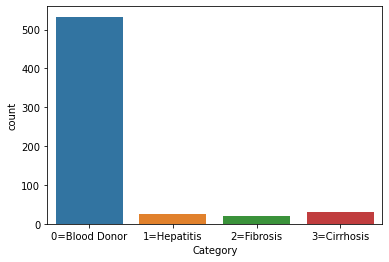

In [2322]:
# Running a count on the target variable
sns.countplot(data['Category'])

In [2323]:
data['Category'].value_counts(normalize=True)

0=Blood Donor    0.876645
3=Cirrhosis      0.049342
1=Hepatitis      0.039474
2=Fibrosis       0.034539
Name: Category, dtype: float64

__The value count above shows that 88% of the catgeory column data are blood donors, 5% have Cirrhosis, 4% have Hepatitis and 3% have Fibrosis__

<AxesSubplot:xlabel='New_category', ylabel='GGT'>

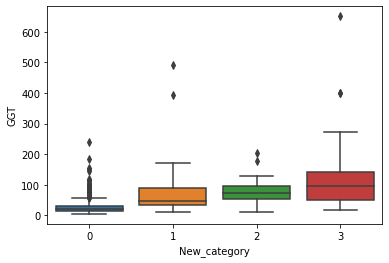

In [2324]:
sns.boxplot( x=data["New_category"], y=data["GGT"] )

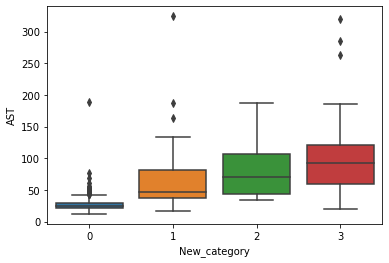

In [2325]:
ax = sns.boxplot(x="New_category", y="AST", data=data)

__Looking at the two boxplots above, one can notice the presence of outliers.__ 

__The Outliers are the black points that are away from the box. Outliers are extreme values that may imapact our data negatively.__

__The outliers will be handled subsequently in this analysis.__


<AxesSubplot:xlabel='count', ylabel='Sex'>

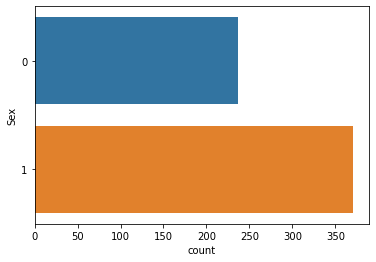

In [2326]:
sns.countplot(y='Sex', data=data)

In [2327]:
data['Sex'].value_counts(normalize=True)

1    0.610197
0    0.389803
Name: Sex, dtype: float64

__The value count above shows 61% instances of the Male Sex and 39% instances of the Female sex in our Sex column__

<AxesSubplot:xlabel='Age', ylabel='Category'>

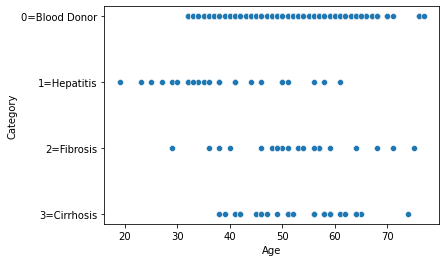

In [2328]:
sns.scatterplot(x ="Age", y ="Category", data = data)

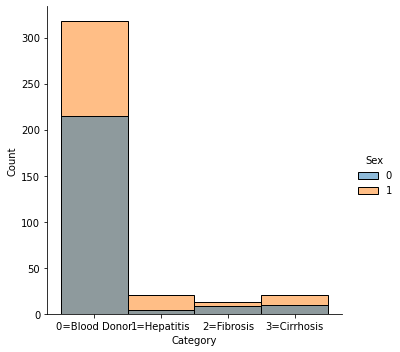

In [2329]:
sns.displot(data, x="Category", hue="Sex")

__The displot above shows the following:__
    
1. Females donate blood more than males

2. There are more Males with hepatitis than females

3. There more Females with Fibrosis than males

4. Both gender share an equal tendencies of having Cirrhosis

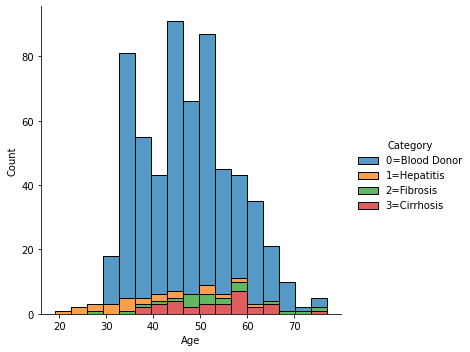

In [2330]:
sns.displot(data, x="Age", hue="Category", multiple="stack")

__From the above displot we can see that:__
    
1. There are no blood donors form ages 29 downwards. The highest blood donors are about 45 years and are 85 or more in number

2. There are less hepatitis cases from age 60 above. Appears like young people have high likelihood of having hepatitis

3. Fibrosis is more prevalent among middle age people with little traces in younger and old people.

4. Cirrhosis is prevalent among middle aged people

In [2331]:
#sns.pairplot(data)

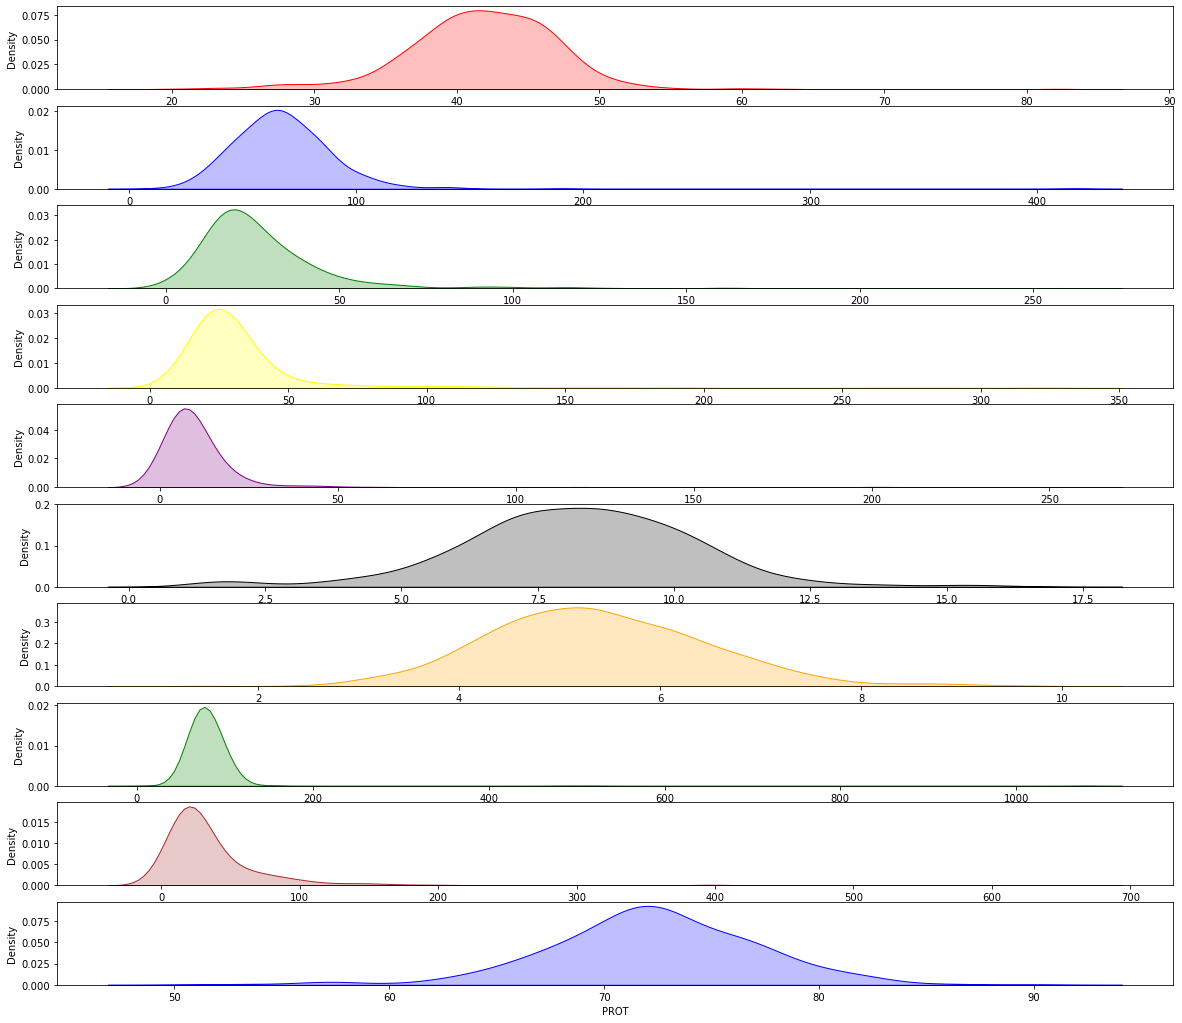

In [2332]:
# Density Plot that displays the distrubion and concentration of data. The peaks of the plots shows where data is concentrated.
fig, axes = plt.subplots(10,1)
fig.set_size_inches(20, 18)
sns.kdeplot(data.ALB , shade=True, color="red" , ax= axes[0])
sns.kdeplot(data.ALP , shade=True, color="blue" , ax= axes[1])
sns.kdeplot(data.ALT , shade=True, color="green" , ax= axes[2])
sns.kdeplot(data.AST , shade=True, color="yellow" , ax= axes[3])
sns.kdeplot(data.BIL , shade=True, color="purple" , ax= axes[4])
sns.kdeplot(data.CHE , shade=True, color="black" , ax= axes[5])
sns.kdeplot(data.CHOL , shade=True, color="orange" , ax= axes[6])
sns.kdeplot(data.CREA , shade=True, color="green" , ax= axes[7])
sns.kdeplot(data.GGT , shade=True, color="brown" , ax= axes[8])
sns.kdeplot(data.PROT , shade=True, color="blue" , ax= axes[9])
plt.show()

In [2333]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,...,CREA,GGT,PROT,Female,Male,Age_Categories,Middle_Aged,Old_Adults,Young_Adults,New_category
0,1,0=Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,...,106.0,12.1,69.0,0,1,Young_Adults,0,0,1,0
1,2,0=Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,...,74.0,15.6,76.5,0,1,Young_Adults,0,0,1,0
2,3,0=Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,...,86.0,33.2,79.3,0,1,Young_Adults,0,0,1,0
3,4,0=Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,...,80.0,33.8,75.7,0,1,Young_Adults,0,0,1,0
4,5,0=Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,...,76.0,29.9,68.7,0,1,Young_Adults,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,0,32.0,416.6,5.9,110.3,50.0,5.57,...,55.7,650.9,68.5,1,0,Old_Adults,0,1,0,3
611,612,3=Cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,...,63.0,35.9,71.3,1,0,Old_Adults,0,1,0,3
612,613,3=Cirrhosis,64,0,29.0,87.3,3.5,99.0,48.0,1.66,...,66.7,64.2,82.0,1,0,Old_Adults,0,1,0,3
613,614,3=Cirrhosis,46,0,33.0,66.0,39.0,62.0,20.0,3.56,...,52.0,50.0,71.0,1,0,Middle_Aged,1,0,0,3


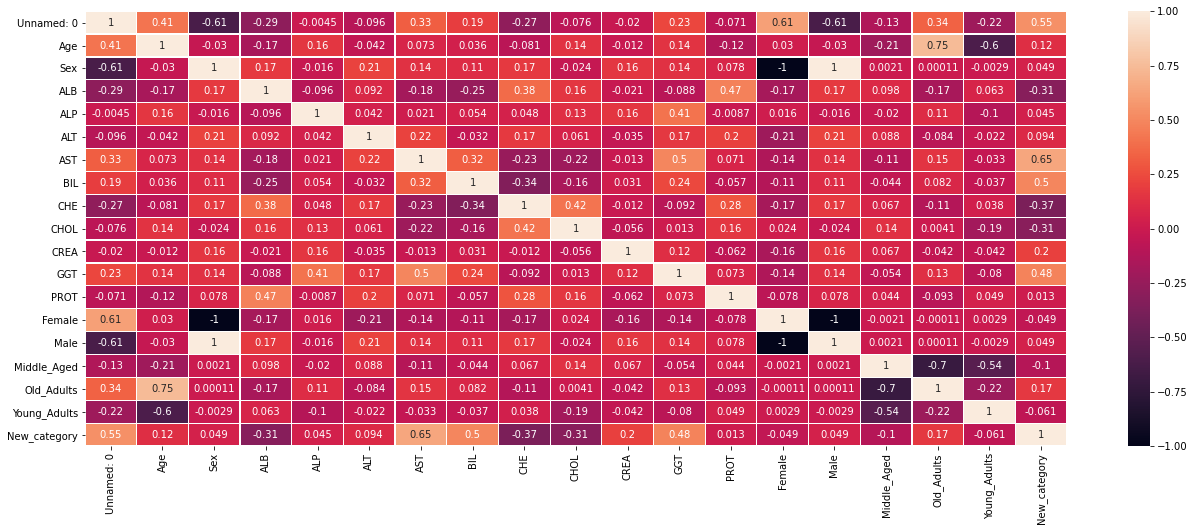

In [2334]:
#checking the correlation between features
sns.heatmap(data.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(22,8)
plt.show()

__Feature Selection__

Dropping columns that are irrelevant to our Machine learning Model

In [2336]:
data = data.drop(columns=['Unnamed: 0', 'Category', 'Age_Categories', 'Sex', 'Age'], axis = 1)

In [2337]:
import scipy.stats as stats

#find absolute value of z-score for each observation
z = np.abs(stats.zscore(data))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data = data[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data.shape

(536, 16)

In [2338]:
#Instantiating a threadpool to handle accuracy score and classification report
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import classification_report, confusion_matrix

def model_testing(md):
    with ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(md.fit, X_train, y_train)
    print("Training Accuracy: ", md.score(X_train, y_train), '\n')
    print("Testing Accuracy: ", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(data.drop(columns=['New_category']))

In [2339]:
 # separate the independent and dependent variables
X = data.drop(['New_category'], axis=1).values
y = data['New_category'].values

__Data Standardisation__

The choice of standardization is based on the fact that standarsiation is more robust to outliers than normalisation

In [2341]:
# standardization of dependent variables
standard = preprocessing.scale(X)

# Machine Learining Model Application 

In [2342]:
# Require libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [2343]:
# Defining the object of the classifier 
clf = RandomForestClassifier(criterion='entropy',n_estimators=5,max_depth=4,random_state=50).fit(X_train, y_train)

# Evaluating Model Performance

In [2344]:
# Retrieving accuracy and classification report.
model_testing(clf)

Training Accuracy:  0.984 

Testing Accuracy:  0.937888198757764 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.33      0.20      0.25         5
           2       1.00      0.17      0.29         6

    accuracy                           0.94       161
   macro avg       0.76      0.45      0.50       161
weighted avg       0.93      0.94      0.92       161



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot:>

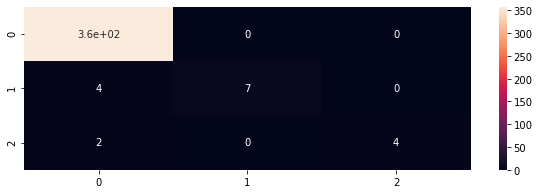

In [2345]:
#Visulaising confusion matrix
cm = confusion_matrix(y_train, clf.predict(X_train))
plt.figure(figsize=(10, 3))
sns.heatmap(cm, annot=True)

# Reason for model choice

For the machine learning model, we will apply the random forest algorithm

The bases of this choice is that the random forest algorithm takes less training time as compared to other algorithms. 

It predicts outputs with high accuracy, it runs efficiently even for a large dataset.

It can also maintain good accuracy when a large proportion of data is missing.

# Justification for parameter choice 

The parammeters in our train test split and model object were chosen because they were the combination that gave me an optimised traininig accuracy and calsssifcation report, which was achieved by tunning the parameters to several combination.

# References

https://archive.ics.uci.edu/ml/datasets/HCV+data#

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/

https://www.kaggle.com/deadskull7/in-depth-analysis-of-titanic-0-85074

https://danokeefe.github.io/HCV.html

https://www.kaggle.com/saife245/titanic-depth-analysis-eda-model

https://www.data-to-viz.com/graph/density.html#:~:text=A%20density%20plot%20is%20a%20representation%20of%20the,histogram%20and%20is%20used%20in%20the%20same%20concept.

https://seaborn.pydata.org/tutorial/distributions.html